Question 1: Convert the model from Keras to TF-Lite format

In [4]:
#import the packages
import tensorflow as tf
from tensorflow import keras

In [5]:
#load the model
model = keras.models.load_model('dino-or-dragon.h5')

2022-11-27 17:54:26.271311: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-27 17:54:26.272132: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 17:54:26.274283: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dino-or-dragon.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmphicfti_p/assets


INFO:tensorflow:Assets written to: /tmp/tmphicfti_p/assets
2022-11-27 17:56:24.643871: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-11-27 17:56:24.644005: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-11-27 17:56:24.646216: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.005ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.

2022-11-27 17:56:25.704371: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2022-11-27 17:56:25.704401: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.


In [8]:
ls -lh

total 129M
-rw-rw-r-- 1 bsarma bsarma  86M Nov 19 19:23 dino-or-dragon.h5
-rw-rw-r-- 1 bsarma bsarma  43M Nov 27 17:56 dino-or-dragon.tflite
-rw-rw-r-- 1 bsarma bsarma 4.1K Nov 27 17:56 homework09.ipynb
-rw-rw-r-- 1 bsarma bsarma 5.4K Nov 27 17:48 homework.md
-rw-rw-r-- 1 bsarma bsarma 264K Nov 25 18:14 week12-notebook.ipynb


**Answer to question 1**<br>
`43 Mb`

In [9]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path='dino-or-dragon.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
output_index

13

**Answer to question 2**<br>
`13 Mb`

In [14]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

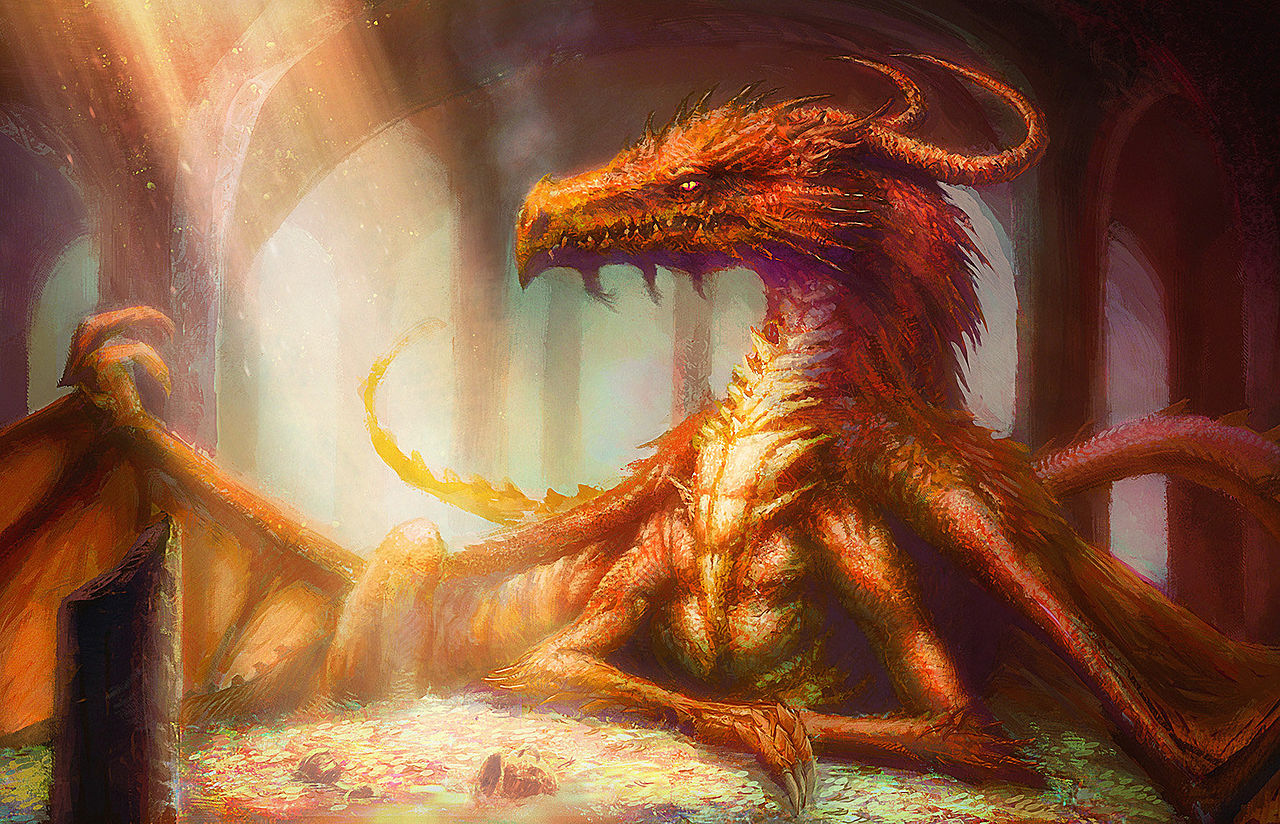

In [19]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Smaug_par_\
David_Demaret.jpg/1280px-Smaug_par_David_Demaret.jpg'
image = download_image(url)
image

/tmp/ipykernel_6503/2487457277.py:17: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize(target_size, Image.NEAREST)


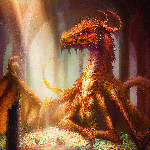

In [20]:
image = prepare_image(image, target_size=(150,150))
image

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#rescale 0-255 to 0-1
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [25]:
import numpy as np

In [31]:
np.array(image).shape

(150, 150, 3)

In [36]:
np.array(image)[10][10] #gives RGB in 10th row and 10th col pixel

array([163,  91,  66], dtype=uint8)

In [37]:
x = np.array(image)/255.0
x[10][10]

array([0.63921569, 0.35686275, 0.25882353])

In [39]:
x[0][0]

array([0.55294118, 0.31764706, 0.17647059])

****Answer to question 3**<br>
`0.5529412`